In [3]:
import pandas as pd

In [4]:
permits = pd.read_csv('approvedpermits.csv')
permits['issued_date'] = pd.to_datetime(permits['issued_date'])

permits.head()

/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/281371782.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('approvedpermits.csv')


,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_point_2249,geom_point_4326
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00:00,2021-07-28 04:00:00+00,...,181-183 State ST,Boston,MA,2109.0,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,0101000020E6100000A703291D63C351C074AD05ECF92D...
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$29.00,2011-11-04 15:04:58+00:00,2012-05-04 04:00:00+00,...,175 W Boundary RD,West Roxbury,MA,2132.0,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,0101000020E61000005F23793993C951C071ECAA3E6021...
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00:00,NaN,...,15 Prospect ST,Charlestown,MA,2129.0,113443.0,2.028370e+08,2.962078e+06,775710.380542,0101000020C90800007E6BD6C23CAC2741422F500F4F99...,0101000020E6100000F053B47AAFC351C0A6BB62F20730...
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00:00,2020-05-13 04:00:00+00,...,211 W Springfield ST,Roxbury,MA,2118.0,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,0101000020E6100000D72A24D322C551C044521DC4982B...
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$182.00,2013-01-03 19:13:09+00:00,2013-07-03 04:00:00+00,...,14 William Jackson AVE,Brighton,MA,2135.0,149852.0,2.204944e+09,2.950791e+06,749690.298790,0101000020C9080000FCFDFA98F4E02641F6694F594383...,0101000020E61000009DED6FF7DBC951C0929A5BD71B2C...


In [7]:
# UNDERSTANDING PERMIT'S BEING ISSUED OVER TIME BY ZIP CODE
a = permits
grouped_yearly = a.groupby([pd.Grouper(key='issued_date', freq='Y'), 'zip']).size().reset_index(name='counts')
pivot_df_yearly = grouped_yearly.pivot(index='issued_date', columns='zip', values='counts').fillna(0)
total_counts_per_zip = pivot_df_yearly.sum().sort_values(ascending=False)
top_10_zip_codes = total_counts_per_zip.head(10).index
filtered_data = pivot_df_yearly[top_10_zip_codes]

# Filter the DataFrame to include only years from 2011 to 2023
filtered_data_yearly_2011 = filtered_data.loc[(filtered_data.index.year >= 2011) & (filtered_data.index.year <= 2023)]

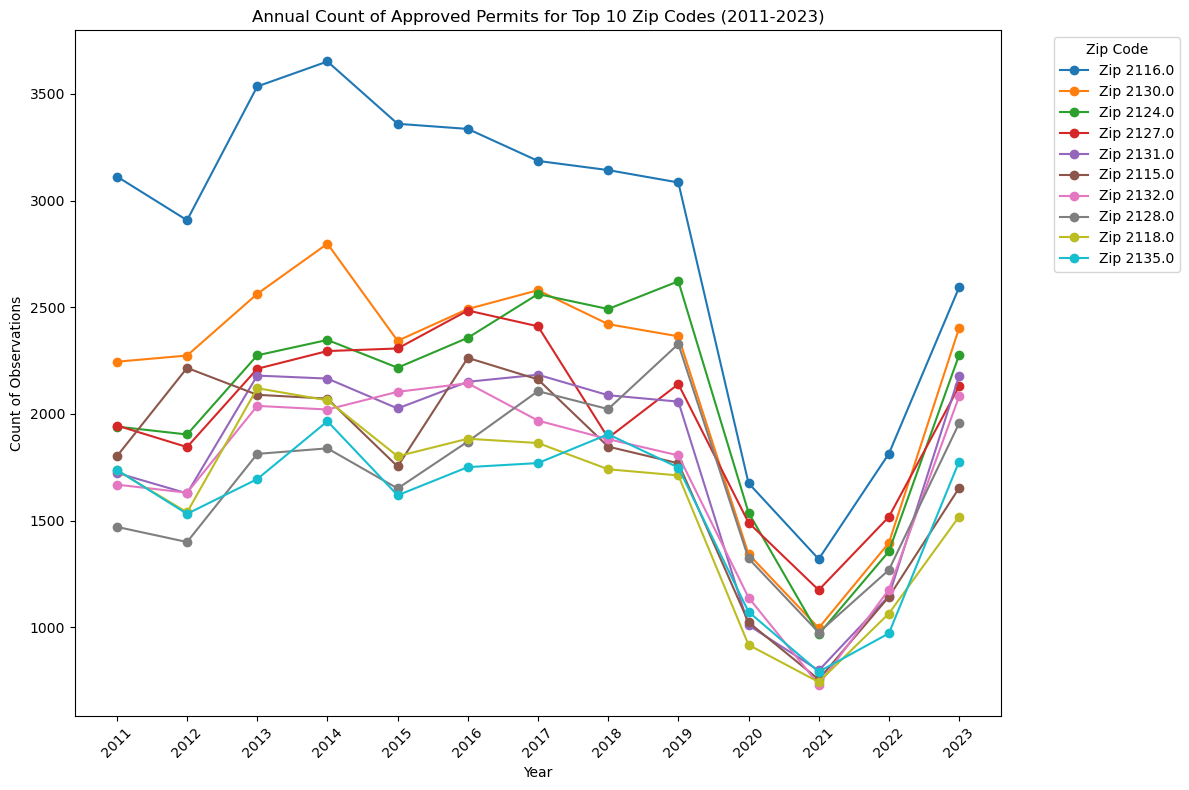

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for column in filtered_data_yearly_2011.columns:
    plt.plot(filtered_data_yearly_2011.index.year, filtered_data_yearly_2011[column], marker='o', linestyle='-', label=f'Zip {column}')

plt.title('Annual Count of Approved Permits for Top 10 Zip Codes (2011-2023)')
plt.xlabel('Year')
plt.ylabel('Count of Observations')
plt.legend(title='Zip Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-ticks to be every year in the range (optional for clarity)
plt.xticks(range(2011, 2024), rotation=45)  # Adjust the range as needed for clarity

plt.tight_layout()
plt.show()


In [8]:
# UNDERSTANDING THE TYPES OF PERMITS
unique_worktypes = permits['worktype'].unique()
unique_worktypes

array(['INTEXT', 'COB', 'OTHER', 'EXTREN', 'INTREN', 'VIOL', 'ADDITION',
       'EXTDEM', 'FA', 'SPRINK', 'SIGNES', 'CELL', 'NEWCON', nan, 'ERECT',
       'SPRNK9', 'SITE', 'ROOF', 'FSTTRK', 'PLUMBING', 'CHGOCC', 'SOL',
       'SPCEVE', 'INTDEM', 'General', 'CANP', 'AWNING', 'TCOO', 'FENCE2',
       'INSUL', 'GEN', 'GARAGE', 'SD', 'LVOLT', 'SIDE', 'SIGNS', 'RESPAR',
       'ELECTRICAL', 'DRIVE', 'NROCC', 'MAINT', 'TEMTRL', 'INDBLR',
       'SPFT', 'RNWSIG', 'COMPAR', 'AWNRNW', 'AWNRET', 'CANPRN', 'RAZE',
       'TMPSER', 'HOLVEN', 'OSEAT', 'FENCE', 'TMPUSOC', 'FLAM', 'CONVRT',
       'Repair', 'SRVCHG', 'TVTRK', 'BFCHMDECMA', 'Service', 'Main',
       'TRENCH', 'GAS', 'New', 'INDFUR', 'BFCHMTENT', 'BFCHMFLOOR',
       'BFCHMINFIN', 'BFCHMTEMPE', 'Fencing', 'SpecEvent', 'BFCHMMATTR',
       'Dumpsters', 'Staging', 'SpeEvents'], dtype=object)

In [9]:
worktype_counts = permits['worktype'].value_counts()
worktype_counts.head(20)

ELECTRICAL    128927
PLUMBING       83808
GAS            60251
INTREN         54395
LVOLT          44953
INTEXT         36141
FA             33527
OTHER          23069
ROOF           21395
EXTREN         21016
INSUL          12170
SOL            12018
FSTTRK         11435
CHGOCC         10022
INTDEM          7644
COB             6080
ERECT           5558
SIGNES          4827
SIDE            4665
TMPSER          4365
Name: worktype, dtype: int64

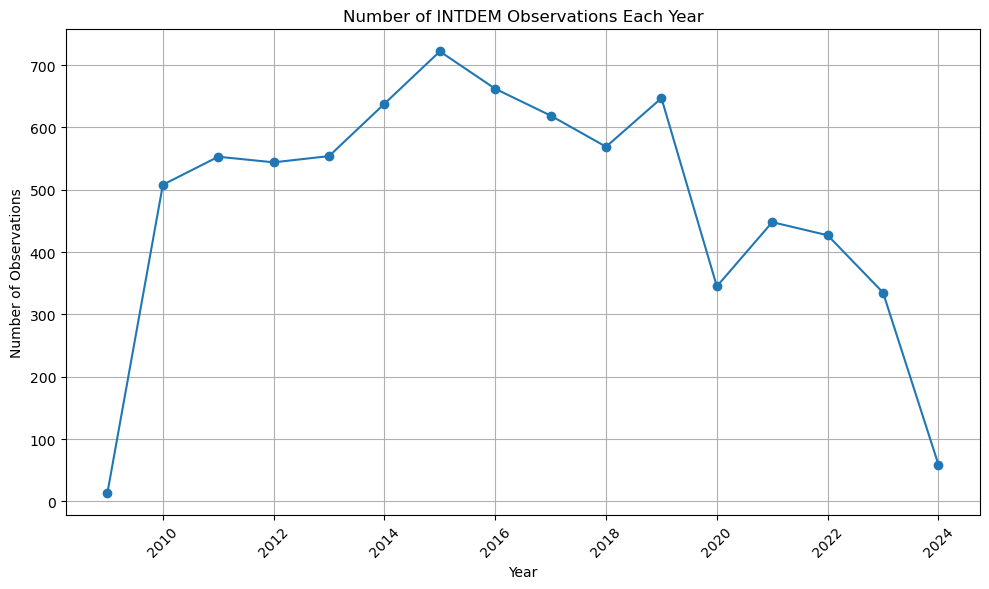

In [11]:
intdem = permits[permits['worktype'] == 'INTDEM']


# Extract the year and group by it, then count observations
intdem_yearly_count = intdem.groupby(intdem['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))
intdem_yearly_count.plot(kind='line', marker='o')
plt.title('Number of INTDEM Observations Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

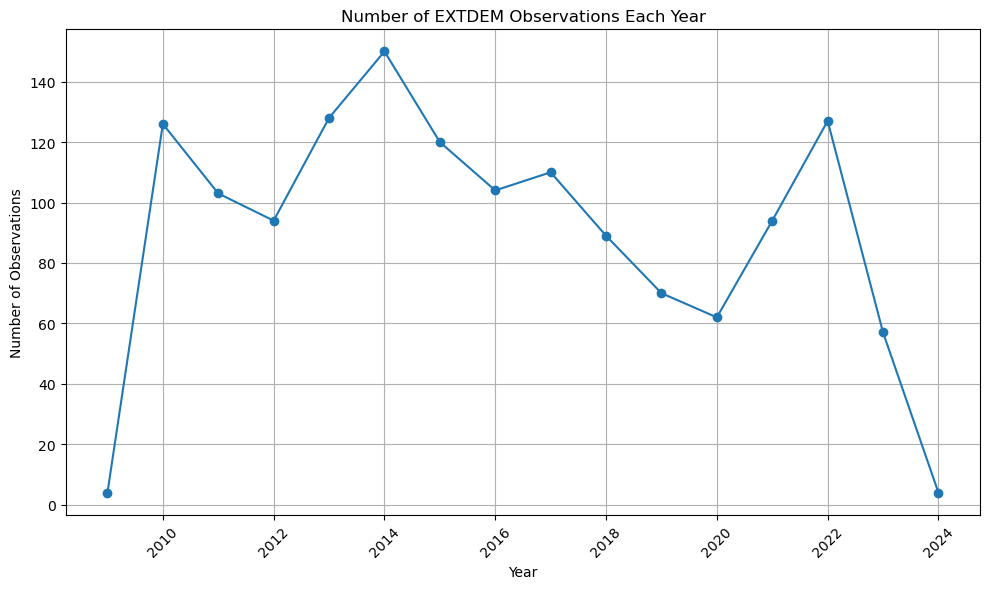

In [12]:
extdem = permits[permits['worktype'] == 'EXTDEM']


# Extract the year and group by it, then count observations
extdem_yearly_count = extdem.groupby(extdem['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))
extdem_yearly_count.plot(kind='line', marker='o')
plt.title('Number of EXTDEM Observations Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

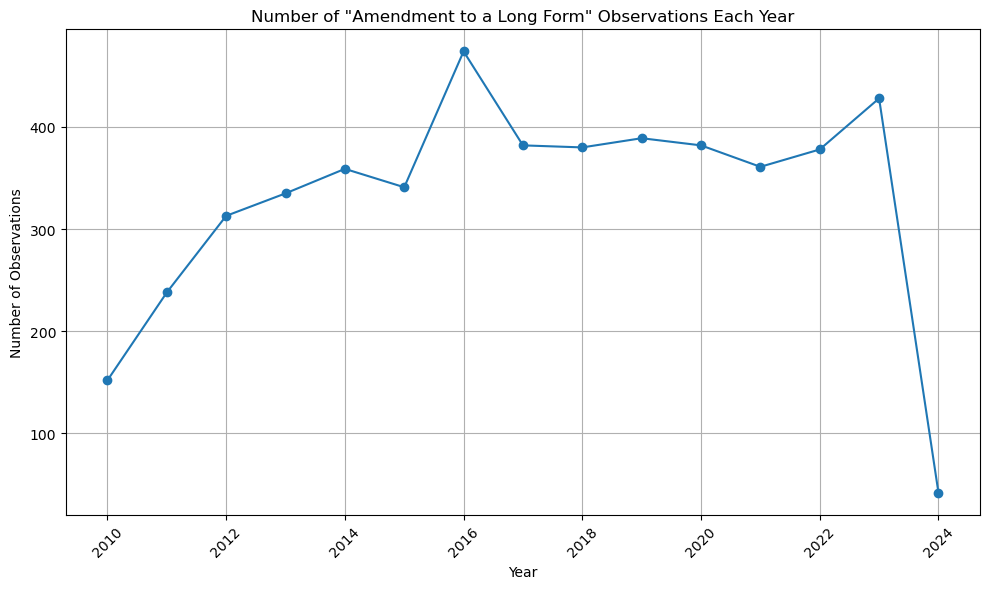

In [13]:
amend_long_form = permits[permits['permittypedescr'] == 'Amendment to a Long Form']


# Extract the year and group by it, then count observations
amend_long_form_yearly_count = amend_long_form.groupby(amend_long_form['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))
amend_long_form_yearly_count.plot(kind='line', marker='o')
plt.title('Number of "Amendment to a Long Form" Observations Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/499294227.py:5: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/499294227.py:5: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/499294227.py:5: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/499294227.py:5: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/499294227.py:5: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or 

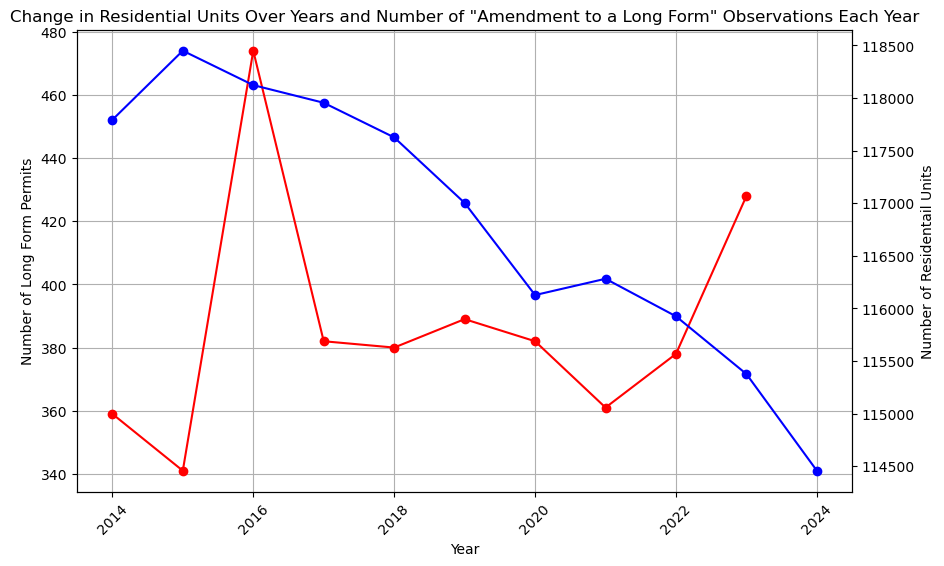

In [12]:
vals = {}

for i in range(2014, 2025):
    f = f'PropertyAssessmentDatasets/assess{i}.csv'
    df = pd.read_csv(f)
    count = 0

    lu_counts = df['LU'].value_counts()

    for j in range(1, 5):
        if f'R{j}' in lu_counts:
            count += j * lu_counts[f'R{j}']
    
    vals[i] = count


# Sorting the dictionary by year (key) and unpacking into lists
years, values = zip(*sorted(vals.items()))

amend_long_form = permits[(permits['permittypedescr'] == 'Amendment to a Long Form') & (permits['issued_date'].dt.year >=2014) & (permits['issued_date'].dt.year <=2023)]


# Extract the year and group by it, then count observations
amend_long_form_yearly_count = amend_long_form.groupby(amend_long_form['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))

amend_long_form_yearly_count.plot(kind='line', marker='o', label='number of long form observations', color='r')


plt.title('Change in Residential Units Over Years and Number of "Amendment to a Long Form" Observations Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Long Form Permits')
plt.xticks(rotation=45)
plt.grid(True)

ax2 = plt.twinx()

ax2.plot(years, values, marker='o', linestyle='-', color='b', label='number of residential units')  # Plot line chart

ax2.set_ylabel('Number of Residentail Units')

# Display the plot
plt.show()

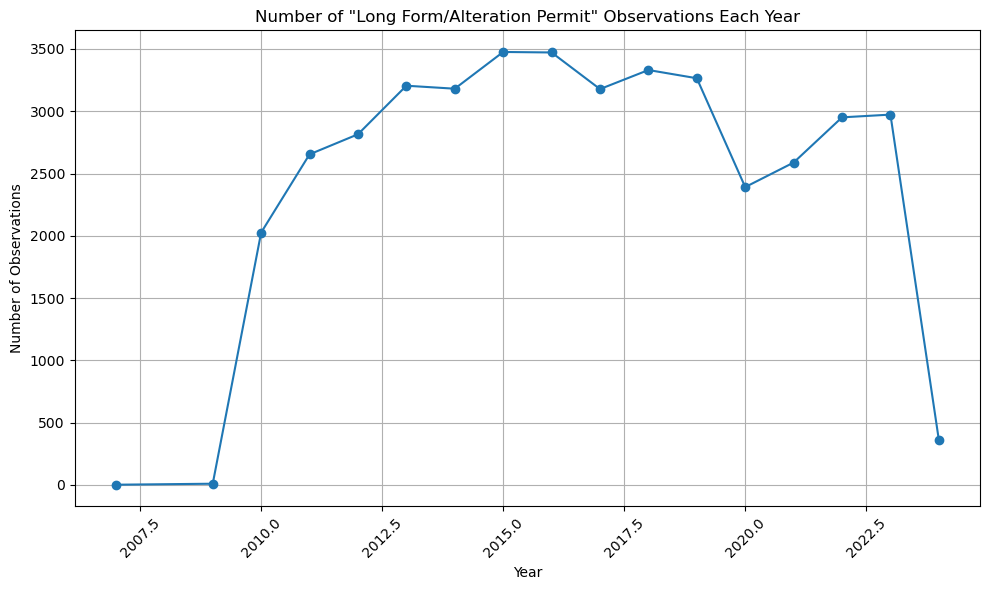

In [16]:
long_form = permits[permits['permittypedescr'] == 'Long Form/Alteration Permit']


# Extract the year and group by it, then count observations
long_form_yearly_count = long_form.groupby(long_form['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))
long_form_yearly_count.plot(kind='line', marker='o')
plt.title('Number of "Long Form/Alteration Permit" Observations Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

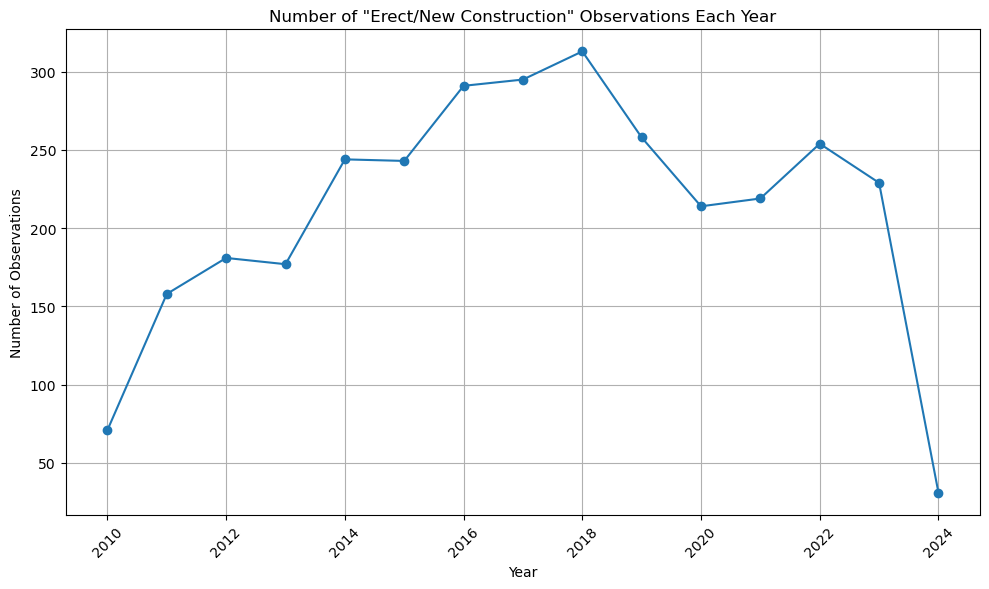

In [17]:
new_construction = permits[permits['permittypedescr'] == 'Erect/New Construction']


# Extract the year and group by it, then count observations
new_construction_yearly_count = new_construction.groupby(new_construction['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))
new_construction_yearly_count.plot(kind='line', marker='o')
plt.title('Number of "Erect/New Construction" Observations Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

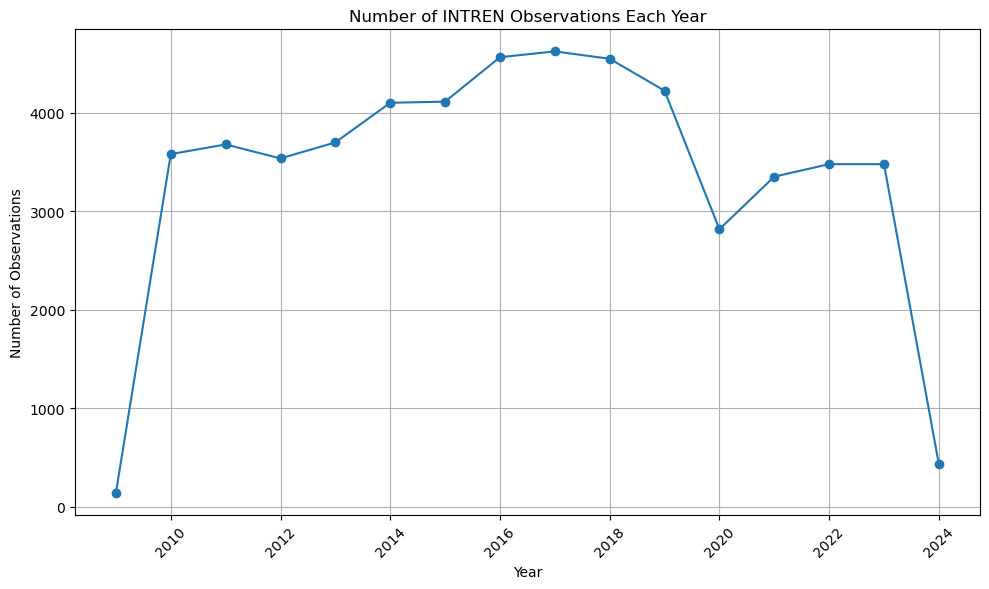

In [19]:

intren = permits[permits['worktype'] == 'INTREN']


# Extract the year and group by it, then count observations
intren_yearly_count = intren.groupby(intren['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))
intren_yearly_count.plot(kind='line', marker='o')
plt.title('Number of INTREN Observations Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

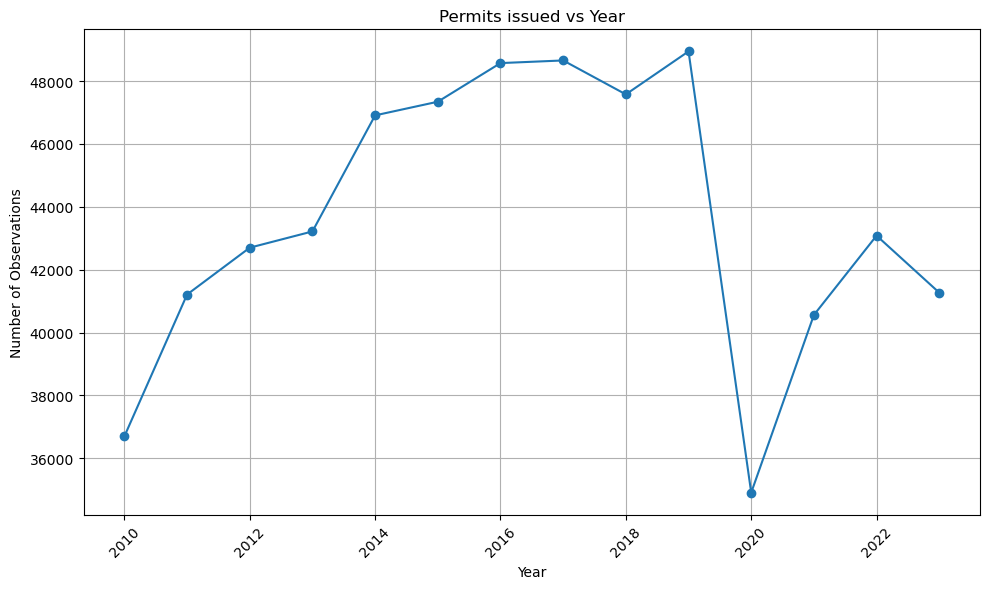

In [8]:
import matplotlib.pyplot as plt

permits = permits[(permits['issued_date'].dt.year >=2010) & (permits['issued_date'].dt.year <=2023)]

# Extract the year and group by it, then count observations
permits_counts = permits.groupby(permits['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))
permits_counts.plot(kind='line', marker='o')
plt.title('Permits issued vs Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [10]:
permits['worktype'] = permits['worktype'].str.upper()

#Based on the description, consolidate into broader categories for simplicity and clearer analysis
worktype_categories = {
    'INTEXT': 'Renovations', 
    'COB': 'Municipal', 
    'OTHER': 'Other', 
    'EXTREN': 'Renovations', 
    'INTREN': 'Renovations', 
    'VIOL': 'Compliance', 
    'ADDITION': 'Additions', 
    'EXTDEM': 'Renovations', 
    'FA': 'Safety Systems', 
    'SPRINK': 'Safety Systems', 
    'SIGNES': 'Signage', 
    'CELL': 'Infrastructure', 
    'NEWCON': 'New Construction', 
    'ERECT': 'New Construction', 
    'SPRNK9': 'Safety Systems', 
    'SITE': 'Site Work', 
    'ROOF': 'Roofing', 
    'FSTTRK': 'Other',
    'PLUMBING': 'Plumbing', 
    'CHGOCC': 'Compliance',
    'SOL': 'Green Energy', 
    'SPCEVE': 'Temporary Structures', 
    'INTDEM': 'Demolition', 
    'GENERAL': 'Other', 
    'CANP': 'Outdoor Structures', 
    'AWNING': 'Outdoor Structures',
    'TCOO': 'Compliance', 
    'FENCE2': 'Fencing', 
    'INSUL': 'Renovations', 
    'GEN': 'Infrastructure', 
    'GARAGE': 'New Construction', 
    'SD': 'Site Work', 
    'LVOLT': 'Electrical', 
    'SIDE': 'Renovations', 
    'SIGNS': 'Signage',
    'RESPAR': 'Infrastructure', 
    'ELECTRICAL': 'Electrical', 
    'DRIVE': 'Site Work', 
    'NROCC': 'Compliance', 
    'MAINT': 'Maintenance', 
    'TEMTRL': 'Temporary Structures', 
    'INDBLR': 'Infrastructure', 
    'SPFT': 'Other',
    'RNWSIG': 'Signage', 
    'COMPAR': 'Infrastructure', 
    'AWNRNW': 'Outdoor Structures', 
    'AWNRET': 'Outdoor Structures', 
    'CANPRN': 'Outdoor Structures', 
    'RAZE': 'Demolition', 
    'TMPSER': 'Temporary Structures', 
    'HOLVEN': 'Temporary Structures',
    'OSEAT': 'Outdoor Structures', 
    'FENCE': 'Fencing', 
    'TMPUSOC': 'Compliance', 
    'FLAM': 'Safety Systems', 
    'CONVRT': 'Other', 
    'REPAIR': 'Maintenance', 
    'SRVCHG': 'Electrical', 
    'TVTRK': 'Temporary Structures',
    'BFCHMDECMA': 'Renovations', 
    'SERVICE': 'Maintenance', 
    'MAIN': 'Maintenance', 
    'TRENCH': 'Site Work', 
    'GAS': 'Plumbing', 
    'NEW': 'New Construction', 
    'INDFUR': 'Infrastructure', 
    'BFCHMTENT': 'Temporary Structures',
    'BFCHMFLOOR': 'Renovations', 
    'BFCHMINFIN': 'Renovations', 
    'BFCHMTEMPE': 'Temporary Structures', 
    'FENCING': 'Fencing', 
    'SPECEVENT': 'Temporary Structures', 
    'BFCHMMATTR': 'Renovations',
    'DUMPSTERS': 'Site Work', 
    'STAGING': 'Site Work', 
    'SPEEVENTS': 'Temporary Structures'
}
#Step 2: Apply the mapping to consolidate work types
permits['worktype_category'] = permits['worktype'].map(worktype_categories).fillna('Other')


/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/4152956743.py:5: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/4152956743.py:5: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/4152956743.py:5: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/4152956743.py:5: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_16502/4152956743.py:5: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on impor

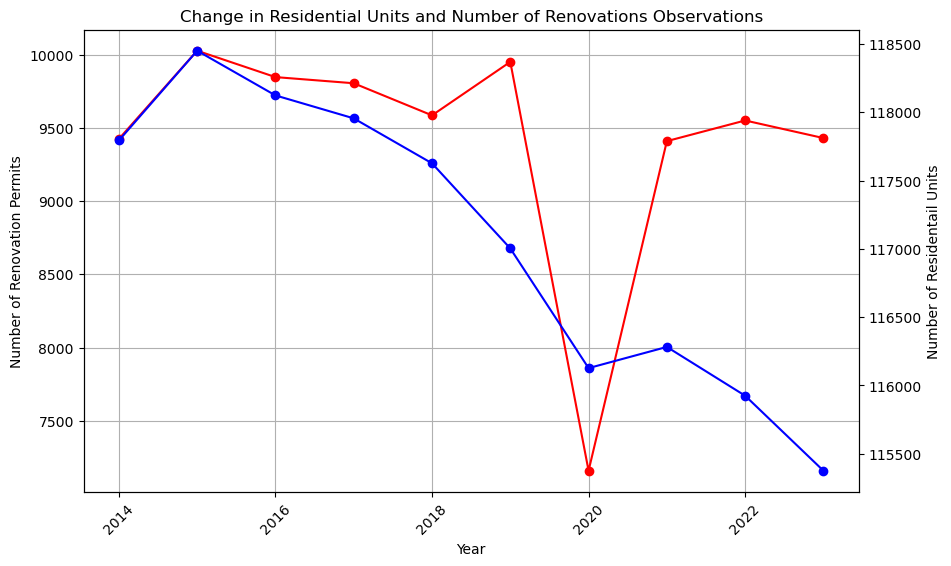

In [11]:
vals = {}

for i in range(2014, 2024):
    f = f'PropertyAssessmentDatasets/assess{i}.csv'
    df = pd.read_csv(f)
    count = 0

    lu_counts = df['LU'].value_counts()

    for j in range(1, 5):
        if f'R{j}' in lu_counts:
            count += j * lu_counts[f'R{j}']
    
    vals[i] = count


# Sorting the dictionary by year (key) and unpacking into lists
years, values = zip(*sorted(vals.items()))

renovations = permits[(permits['worktype_category'] == 'Renovations') & (permits['issued_date'].dt.year >=2014) & (permits['issued_date'].dt.year <=2023)]


# Extract the year and group by it, then count observations
renovations_count = renovations.groupby(renovations['issued_date'].dt.year).size()

plt.figure(figsize=(10, 6))

renovations_count.plot(kind='line', marker='o', label='number of long form observations', color='r')


plt.title('Change in Residential Units and Number of Renovations Observations')
plt.xlabel('Year')
plt.ylabel('Number of Renovation Permits')
plt.xticks(rotation=45)
plt.grid(True)

ax2 = plt.twinx()

ax2.plot(years, values, marker='o', linestyle='-', color='b', label='Number of Residential Units')  # Plot line chart

ax2.set_ylabel('Number of Residentail Units')

# Display the plot
plt.show()